# Determineeritud kaos

Varasemas loengus oleme näinud, kuidas nii pidevad kui diskreetsed dünaamilised süsteemid võivad käituda kaootiliselt. Üks näitaja oli Lyapunovi eksponent. Käesolev tööleht näitab kaootilise dünaamilise süsteemi, ehk determineeritud kaose omadusi. Selleks kasutame PyPlot, NumPy ja Sympy.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Math, display

sp.init_printing(use_unicode=True)

## Kujutuse definitsioonid

Me uurime kolm kujutust faasiruumis $Q = [0, 1]$. Need on logistiline kojutus, telgikujutus ja saehambakujutus.

### Logistiline kujutus

Juba varasemas loengus oleme logistilise kujutuse $f_r(x) = rx(1 - x)$ käitumist uurinud. Siin keskendume parameetri väärtusele $r = 4$ ja uurime ainult funktsiooni $L(x) = f_4(x)$. Tuletame meelde, et sellisel juhul käitub süsteem kaootiliselt. Seega defineerime:

In [2]:
def logi(x):
    return 4 * x * (1 - x)

Funktsiooni joonis on selline:

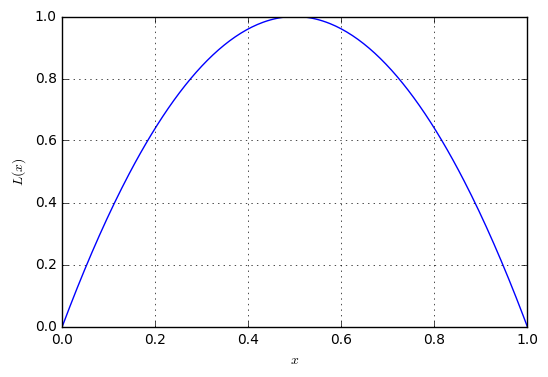

In [3]:
XX = np.linspace(0.0, 1.0, 251)
YY = [logi(x) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$L(x)$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Parameeter $r = 4$ on valitud selleks, et funktsiooni kujutis on kogu hulk $[0, 1]$.

### Telgikujutus

Teine kujutus vahemikus $[0, 1]$, mida käesolev tööleht käsitleb, on telgikujutus, mida võib defineerida valemi

$$T(x) = 1 - 2\left|x - \frac{1}{2}\right|$$

abil. SymPy-ga defineerime:

In [4]:
def tent(x):
    return 1 - 2 * sp.Abs(x - sp.Rational(1, 2))

Funktsioonile vastav joonis on selline:

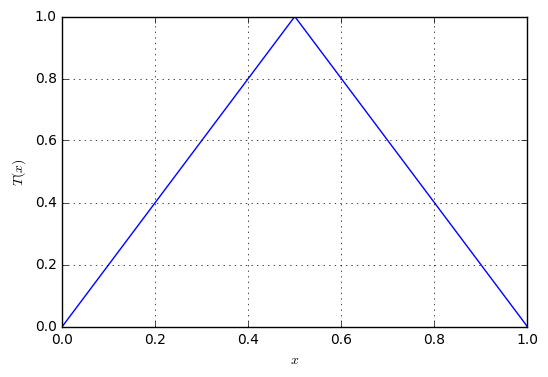

In [5]:
XX = np.linspace(0.0, 1.0, 251)
YY = [tent(x) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$T(x)$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Joonis näitab, et funktsioon on kvalitatiivselt sarnane logistilise kujutusega. Piltlikult võib öelda, et funktsioon koosneb kahest sammust - vahemiku $[0, 1]$ kahe võrra pikemaks *venitamisest* ja seejärel *kokku voldimisest*. Hiljem näeme, et logistiline ja telgikujutus on ka kvantitatiivselt sarnased kujutused.

### Saehambakujutus

Viimane kujutus, mida me siin uurime, on saehambakujutus. Gaussi sulgude kasutades võime kirjutada

$$S(x) = 2x - \lfloor 2x \rfloor.$$

SymPy-ga defineerime:

In [6]:
def saw(x):
    return 2 * x - sp.floor(2 * x)

Joonis tuleb siis selline:

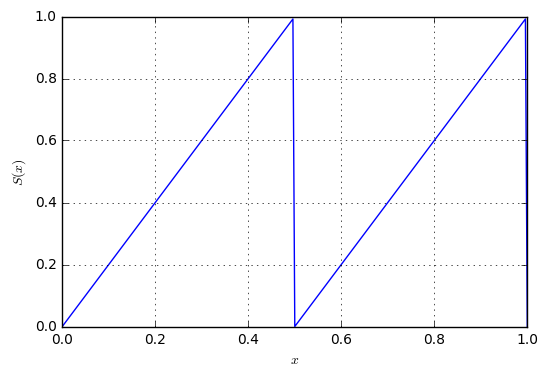

In [7]:
XX = np.linspace(0.0, 1.0, 251)
YY = [saw(x) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$S(x)$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Ka see funktsioon koosneb kahest sammust: vahemiku $[0, 1]$ kahe võrra pikemaks *venitamisest* ja seejärel *lõikamisest / kokku kleepimisest*.

## Matemaatiline vahepala: kahendesitus

Telgi ja saehambakujutuse uurimiseks on kõige lihtsam kasutada kahendsüsteemi.

### Definitsioon

Suvalist reaalarvu $a \in \mathbb{R}^+$ võib kirjutada kujul

$$a = \sum_{j = -N}^{\infty}a_j2^{-j} = a_{-N}a_{-N + 1} \cdots a_{-1}a_0.a_1a_2a_3\ldots,$$

kus $a_j \in \{0, 1\}$ on kahendnumbrid, ja $N$ on valitud nii, et $a_{-N} = 1$. Kui $0 \leq a < 1$ leiame, et $a_j = 0$ kui $j \geq 0$, ja seega võime kirjutada

$$a = \sum_{j = 1}^{\infty}a_j2^{-j} = 0.a_1a_2a_3\ldots.$$

Arvu $a$ kahendesitus ei ole tingimata unikaalne. Kui ta on antud kujul

$$a = 0.a_1a_2 \ldots a_n0111111\ldots = 0.a_1a_2 \ldots a_n0\overline{1},$$

kus $\overline{1}$ tähendab, et $1$ kordub lõpmatult, siis vastab samale arvule ka kahendesitus

$$a = 0.a_1a_2 \ldots a_n1000000\ldots = 0.a_1a_2 \ldots a_n1.$$

Tavaliselt kasutame kahendesitust normaalkujul, kus $0\overline{1}$ on asendatud $1$-ga, kuid antud juhul võib ka vastupidine valik kasulik olla.

### Ratsionaalarvud

Kui $a = \frac{p}{q} \in \mathbb{Q} \cap (0, 1)$ on ratsionaalarv, kus $p, q \in \mathbb{N}$, leiame et tema kahendesitus on perioodiline. Täpsemalt leiame:

* Kui $q = 2^n$ on arvu kahe aste, siis kahendesitus on lõplik, ehk $a_j = 0$ iga $j > n$ korral.
* Kui $q$ on paaritu, siis kahendesitus koosneb ainult perioodilisest osast, $$a = 0.a_1 \cdots a_na_1 \cdots a_na_1 \cdots a_n\ldots = 0.\overline{a_1 \cdots a_n}.$$
* Kui $q$ on paaris, aga mitte kahe aste, koosneb kahendesitus lõplikust ja perioodilisest osast, $$a = 0.a_1 \cdots a_k\overline{a_{k + 1} \cdots a_{k + n}}.$$

Ratsionaalarvu kahendesituse leidmiseks võib kasutada sellist algoritmi:

In [8]:
def ratbin(r):
    s = '.'
    if r >= 1:
        i = sp.floor(r)
        r = r - i
        while i > 0:
            s = str(i % 2) + s
            i = i // 2
    else:
        s = '0' + s
    p = r.p
    q = r.q
    while q % 2 == 0:
        q = q // 2
        if p >= q:
            s = s + '1'
            p = p - q
        else:
            s = s + '0'
    if p == 0:
        return Math(s)
    s = s + '\\overline{'
    p0 = p
    while True:
        p = 2 * p
        if p >= q:
            s = s + '1'
            p = p - q
        else:
            s = s + '0'
        if p == p0:
            break
    s = s + '}'
    return Math(s)

Ratsionaalarvu kirjeldab SymPy funktsioon `Rational`:

In [9]:
ratbin(sp.Rational(1, 3))

<IPython.core.display.Math object>

### Irratsionaalarvud

Irratsionaalarvu korral on kahendesitus lõpmatu ja mitte perioodiline. Selle leidmiseks peame valima, mitu numbrikohta meie algoritm kuvab:

In [10]:
def irrbin(x, n):
    s = '.'
    if x >= 1:
        i = sp.floor(x)
        x = x - i
        while i > 0:
            s = str(i % 2) + s
            i = i // 2
    else:
        s = '0' + s
    for _ in range(n):
        x = 2 * x
        if x >= 1:
            s = s + '1'
            x = x - 1
        else:
            s = s + '0'
    s = s + '\\ldots'
    return Math(s)

Siin on näiteks $\frac{1}{\pi}$:

In [11]:
irrbin(1 / sp.pi, 50)

<IPython.core.display.Math object>

### Saehambakujutuse kahendesitus

Kahendesituse abil saame nüüd ka saehambakujutust kirjeldada. Kui $x = 0.x_1x_2\ldots$, siis

$$2x = x_1.x_2x_3\ldots,$$

ja seega

$$S(x) = 2x - \lfloor 2x \rfloor = x_1.x_2x_3\ldots - x_1 = 0.x_2x_3\ldots$$

Sellest järeldub et saehambakujutus toimib kui nihkeoperaator, mis nihutab kahendesitust ühe numbrikohta vasakule, ja eemaldab numbri $x_1$.

Siin peame kahendesitust valima normaalkujul, selleks et

$$0 = S\left(\frac{1}{2}\right) = S(0.1) = 0.0.$$

Vastasel juhul leiame

$$0 = S\left(\frac{1}{2}\right) \neq S(0.0\overline{1}) = 0.\overline{1} = 1.$$

### Telgikujutuse kahendesitus

Telgikujutust võime samuti kirjeldada kahendsüsteemis. Selleks kirjutame $T(x) = y$. Funktsiooni uurides leiame:

* Kui $0 \leq x < \frac{1}{2}$, siis $x_1 = 0$, ja $$y = 2x = 0.x_2x_3\ldots,$$ ehk $y_j = x_{j + 1}$.
* Kui $\frac{1}{2} < x < 1$, siis $x_1 = 1$ $$y = 2(1 - x) = 0.x_2^*x_3^*\ldots,$$ kus $y_j = x_{j + 1}^* = 1 - x_{j + 1}$.
* Kui $x = \frac{1}{2}$, siis $y = 1$. Kui me kirjutame $\frac{1}{2} = 0.0\overline{1}$, siis saame kirjutada $$T\left(\frac{1}{2}\right) = T(0.0\overline{1}) = 0.\overline{1} = 1.$$
* Kui $x = 1$, siis $y = 0$. Kui me kirjutame $1 = 0.\overline{1}$, siis saame kirjutada $$T(1) = T(0.\overline{1}) = 0.\overline{0} = 0.$$

Kasutades eelnevalt välja toodud definitsioone, võime telgikujutust üldjuhul kirjutada kui $y_j = y_1 - y_{j + 1}$.

## Kaose näitajad

Kahendesituste abil võime nüüd uurida kolm kaootilise süsteemi omadust. Me näitame neid ainult saehambakujutuse puhul, kuna need kujutuse on omavahel seotud.

### Tihedad perioodilised punktid

Esimene omadus mida me uurime on perioodiliste punktide asukohad. Tuletame meelda et punkt $x \in Q$ on *perioodiline*, ehk perioodilise trajektoori peal, kui on olemas $k \in \mathbb{N}$ nii, et $f^k(x) = x$. Punkti $x$ *periood* on kõige väiksem arv $k$ selle omadusega.

Kaootilise süsteemi puhul kehtib, et perioodilised punktid on faasiruumis *tihedad*, see tähendab et igas lahtises vahemikus $U = (a, b) \subset Q$ asub vähemalt üks perioodiline punkt. Seda näitame saehambakujutuse $f = S$ puhul.

Olgu $c \in (a, b)$. Me kirjutame vahemiku piire kujul $a = 0.a_1a_2\ldots$ ja $b = 0.b_1b_2\ldots$ kahendsüsteemis, ja samuti $c = 0.c_1c_2\ldots$. Olgu $k \in \mathbb{N}$ kõige väiksem arv nii, et $a_k < c_k$, ja seega $a_j = c_j$ iga $j < k$ korral. Olgu samuti $m \in \mathbb{N}$ kõige väiksem arv nii, et $c_m < b_m$, ja $n = \max(k, m)$. Kui me valime

$$x = 0.x_1x_2\ldots = 0.\overline{c_1c_2 \cdots c_n},$$

siis kehtib $x > a$, kuna $x_k = c_k > a_k$, ja $x < b$, kuna $x_m = c_m < b_m$. Lisaks leiame et $c$ on perioodiline punkt, kuna

$$S(c) = S(0.\overline{c_1c_2 \cdots c_n}) = 0.\overline{c_2 \cdots c_nc_1},$$

ja seega $S^n(x) = x$.

Järgnev funktsioon kasutab seda algoritmi, valib $c = \frac{a + b}{2}$, ja annab tulemusena $x$ ja perioodi $n$.

In [12]:
def findper(a, b):
    assert a >= 0
    assert b < 1
    assert a < b
    c = (a + b) / 2
    k = m = n = p = q = 0
    while k * m == 0:
        n += 1
        a *= 2
        b *= 2
        c *= 2
        a1 = sp.floor(a)
        b1 = sp.floor(b)
        c1 = sp.floor(c)
        a = a - a1
        b = b - b1
        c = c - c1
        q = 2 * q + 1
        p = 2 * p + c1
        if k == 0 and c1 > a1:
            k = n
        if m == 0 and b1 > c1:
            m = n
    return (sp.Rational(p, q), n)

Näide: Me otsime perioodilist punkti vahemikus $(a, b)$. Seega valime kõigepealt $a$ ja $b$:

In [13]:
a = sp.Rational(19, 51)
b = sp.Rational(32, 85)

print("a:")
sp.pprint(a)
display(ratbin(a))

print("b:")
sp.pprint(b)
display(ratbin(b))

a:
19
──
51


<IPython.core.display.Math object>

b:
32
──
85


<IPython.core.display.Math object>

Kasutame siis algoritmi ja leiame $x$, mis asub selles vahemikus:

In [14]:
(x, n) = findper(a, b)
sp.pprint(x)
display(ratbin(x))
print(a < x)
print(b > x)

191
───
511


<IPython.core.display.Math object>

True
True


Leiame, et $x$ on tõepooolest perioodiline:

In [15]:
for _ in range(n):
    x = saw(x)
    sp.pprint(x)
    display(ratbin(x))

382
───
511


<IPython.core.display.Math object>

253
───
511


<IPython.core.display.Math object>

506
───
511


<IPython.core.display.Math object>

501
───
511


<IPython.core.display.Math object>

491
───
511


<IPython.core.display.Math object>

471
───
511


<IPython.core.display.Math object>

431
───
511


<IPython.core.display.Math object>

351
───
511


<IPython.core.display.Math object>

191
───
511


<IPython.core.display.Math object>

### Segamine

Järgmine omadus mida me uurime on segamine. Me ütleme et diskreetne dünaamiline süsteem $x \mapsto f(x)$ on *segav* siis, kui iga vahemiku $U = (a, b) \subset Q$ ja $V = (u, v) \subset Q$ korral on olemas $x \in U$ ja $p \in \mathbb{N}$ nii, et kehtib $f^p(x) \in V$.

Me näitame segamise omadust saehambakujutuse $f = S$ puhul. Selleks valime $c \in (a, b)$ ja $w \in (u, v)$. Nüüd kasutame sama meetodi kui perioodilise punkti leidmise korral:

* Olgu $k \in \mathbb{N}$ kõige väiksem arv nii, et $a_k < c_k$, ja seega $a_j = c_j$ iga $j < k$ korral.
* Olgu $m \in \mathbb{N}$ kõige väiksem arv nii, et $c_m < b_m$, ja seega $c_j = b_j$ iga $j < m$ korral.
* Olgu $n = \max(k, m)$.
* Olgu $k' \in \mathbb{N}$ kõige väiksem arv nii, et $u_{k'} < w_{k'}$, ja seega $u_j = w_j$ iga $j < k'$ korral.
* Olgu $m' \in \mathbb{N}$ kõige väiksem arv nii, et $w_{m'} < v_{m'}$, ja seega $w_j = v_j$ iga $j < m'$ korral.
* Olgu $n' = \max(k', m')$.

Nüüd valime $p = n$ ja

$$x = 0.x_1x_2\ldots = 0.c_1c_2 \cdots c_nw_1w_2 \cdots w_{n'}.$$

Siis kehtib $x > a$, kuna $x_k = c_k > a_k$, ja $x < b$, kuna $x_m = c_m < b_m$. Dünaamikast järeldub et

$$S^n(x) = 0.w_1w_2 \cdots w_{n'}.$$

Nüüd kehtib $S^n(x) > u$, kuna $w_k > u_k$, ja $S^n(x) < v$, kuna $w_m < v_m$. Sellest järeldub, et saehambakujutus on segav.

Järgnev funktsioon kasutab seda algoritmi, valib $c = \frac{a + b}{2}$ ja $w = \frac{u + v}{2}$, ja annab tulemusena $x$ ja $n$.

In [16]:
def findmix(a, b, u, v):
    assert a >= 0
    assert b < 1
    assert a < b
    assert u >= 0
    assert v < 1
    assert u < v
    c = (a + b) / 2
    w = (u + v) / 2
    k = m = n = p1 = p2 = 0
    q1 = q2 = 1
    while k * m == 0:
        n += 1
        u *= 2
        v *= 2
        w *= 2
        u1 = sp.floor(u)
        v1 = sp.floor(v)
        w1 = sp.floor(w)
        u = u - u1
        v = v - v1
        w = w - w1
        q1 *= 2
        p1 = 2 * p1 + w1
        if k == 0 and w1 > u1:
            k = n
        if m == 0 and v1 > w1:
            m = n
    k = m = n = 0
    while k * m == 0:
        n += 1
        a *= 2
        b *= 2
        c *= 2
        a1 = sp.floor(a)
        b1 = sp.floor(b)
        c1 = sp.floor(c)
        a = a - a1
        b = b - b1
        c = c - c1
        q2 *= 2
        p2 = 2 * p2 + c1
        if k == 0 and c1 > a1:
            k = n
        if m == 0 and b1 > c1:
            m = n
    return (sp.Rational(p2, q2) + sp.Rational(p1, q1 * q2), n)

Näide: Valime vahemikke $(a, b)$ ja $(u, v)$:

In [17]:
a = sp.Rational(17, 65)
b = sp.Rational(24, 91)

print("a:")
sp.pprint(a)
display(ratbin(a))

print("b:")
sp.pprint(b)
display(ratbin(b))

u = sp.Rational(47, 66)
v = sp.Rational(79, 110)

print("u:")
sp.pprint(u)
display(ratbin(u))

print("v:")
sp.pprint(v)
display(ratbin(v))

a:
17
──
65


<IPython.core.display.Math object>

b:
24
──
91


<IPython.core.display.Math object>

u:
47
──
66


<IPython.core.display.Math object>

v:
 79
───
110


<IPython.core.display.Math object>

Kasutame siis algoritmi ja leiame $x$, mis asub vahemikus $(a, b)$:

In [18]:
(x, n) = findmix(a, b, u, v)
sp.pprint(x)
display(ratbin(x))
print(a < x)
print(b > x)

34487 
──────
131072


<IPython.core.display.Math object>

True
True


Lisaks kehtib $S^n(x) \in (u, v)$:

In [19]:
for _ in range(n):
    x = saw(x)

sp.pprint(x)
display(ratbin(x))
print(u < x)
print(v > x)

183
───
256


<IPython.core.display.Math object>

True
True


### Tundlik sõltuvus algtingimustest

Juba varasemas loengus Lyapunovi eksponendi teemal oleme näinud, et kaootilise süsteemi puhul kasvab väike algtingimuste erinevus eksponentsiaalselt. Kahendsüsteemi kasutades võime nüüd näha, kuidas väike erinevus $\epsilon = 2^{-(n + 1)}$ kasvab saekhambakujutuse puhul $n$ sammu jooksul. Selleks valime

\begin{align}
x &= 0.x_1 \cdots x_n0,\\
\tilde{x} &= 0.x_1 \cdots x_n1,
\end{align}

ja kehtib $\tilde{x} - x = \epsilon = 2^{-(n + 1)}$. Nüüd leiame, et

\begin{align}
S^k(x) &= 0.x_{k + 1} \cdots x_n0,\\
S^k(\tilde{x}) &= 0.x_{k + 1} \cdots x_n1.
\end{align}

Kui $k = n$, siis $S^n(x) = 0$ ja $S^n(\tilde{x}) = \frac{1}{2}$, ja lineaarsest lähendusest enam ei piisa.

## Seosed kujutuste vahel

Kujutused $L, T, S$ mida me siin uurime on tihedalt omavahel seotud. Sellepärast aitab ühe funktsiooni uurimiseks, et ka teiste funktsioonide omadusi tuletada.

### Seos saehambakujtuse ja telgikujutuse vahel

Saehambakujutuse ja telgikujutususe vahel kehtib seos $T(T(x)) = T(S(x))$. Seda võib näha ka graafiliselt:

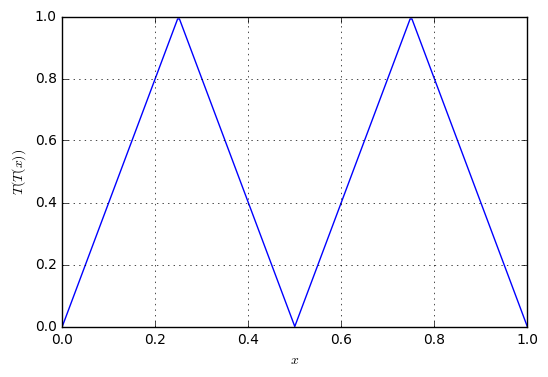

In [20]:
XX = np.linspace(0.0, 1.0, 251)
YY = [tent(tent(x)) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$T(T(x))$")
ax.plot(XX, YY)
ax.grid()
plt.show()

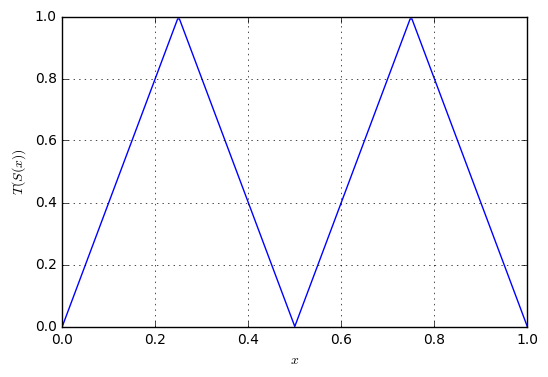

In [21]:
XX = np.linspace(0.0, 1.0, 251)
YY = [tent(saw(x)) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$T(S(x))$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Seda seost mitmekordselt rakendades leiame, et iga $k \in \mathbb{N}$ korral kehtib $T^{k + 1}(x) = T(S^k(x))$.

### Seos telgikujutuse ja logistilise kujutuse vahel

Lõpuks näitame, kuidas telgikujutus ja logistiline kujutus on omavahel seotud. Selleks defineerime funktsiooni

$$h(x) = \left(\sin\frac{\pi x}{2}\right)^2.$$

Pöördfunktsioon on

$$h^{-1}(x) = \frac{2}{\pi}\arcsin\sqrt{x}.$$

SymPy-ga defineerime:

In [22]:
def t2l(x):
    return sp.sin(sp.pi * x / 2) ** 2

def l2t(x):
    return sp.asin(sp.sqrt(x)) * 2 / sp.pi

Joonistame ka $h$ ja $h^{-1}$:

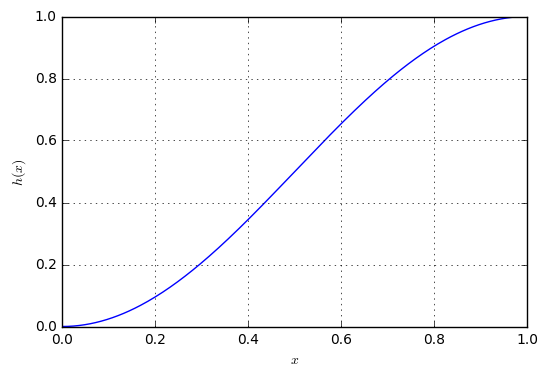

In [23]:
XX = np.linspace(0.0, 1.0, 251)
YY = [t2l(x) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$h(x)$")
ax.plot(XX, YY)
ax.grid()
plt.show()

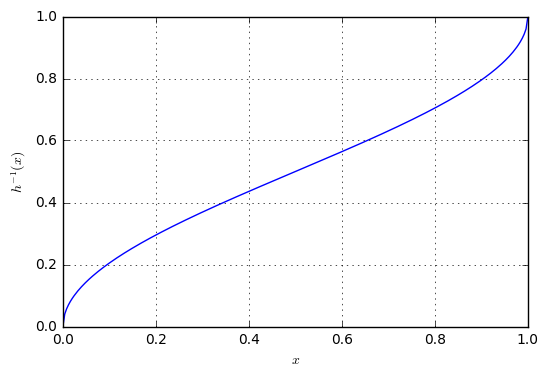

In [24]:
XX = np.linspace(0.0, 1.0, 251)
YY = [l2t(x) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$h^{-1}(x)$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Järgmiseks näitame et kehtib:

$$L(h(x)) = h(T(x)).$$

Me alustame logistilisest kujutusest. Siis leiame:

$$\begin{split}
L(h(x)) &= 4h(x)[1 - h(x)]\\
&= 4\left(\sin\frac{\pi x}{2}\right)^2\left[1 - \left(\sin\frac{\pi x}{2}\right)^2\right]\\
&= 4\left(\sin\frac{\pi x}{2}\right)^2\left(\cos\frac{\pi x}{2}\right)^2\\
&= \left[\sin(\pi x)\right]^2.
\end{split}$$

Valemi parem pool annab meile:

$$\begin{split}
h(T(x)) &= h\left(1 - 2\left|x - \frac{1}{2}\right|\right)\\
&= \left[\sin\left(\frac{\pi}{2} - \pi\left|x - \frac{1}{2}\right|\right)\right]^2\\
&= \left[\cos\left(\pi\left|x - \frac{1}{2}\right|\right)\right]^2\\
&= \left[\cos\left(\pi x - \frac{\pi}{2}\right)\right]^2\\
&= \left[\sin(\pi x)\right]^2.
\end{split}$$

Tulemused on võrdsed. Seega võime funktsiooni $h$ abil logistilise kujutuse ja telgikujutuse vahel tõlkida, sest kehtib

\begin{align}
L(x) &= h(T(h^{-1}(x))),\\
T(x) &= h^{-1}(L(h(x))).
\end{align}

Seda näeme ka graafiliselt:

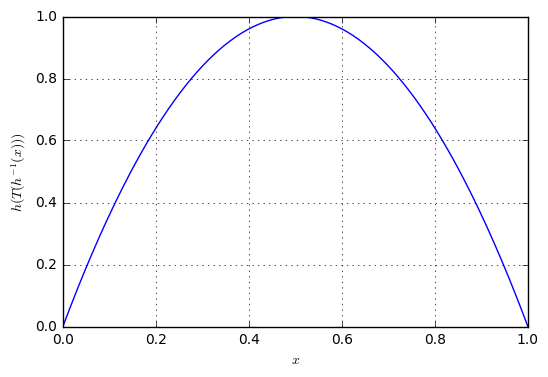

In [25]:
XX = np.linspace(0.0, 1.0, 251)
YY = [t2l(tent(l2t(x))) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$h(T(h^{-1}(x)))$")
ax.plot(XX, YY)
ax.grid()
plt.show()

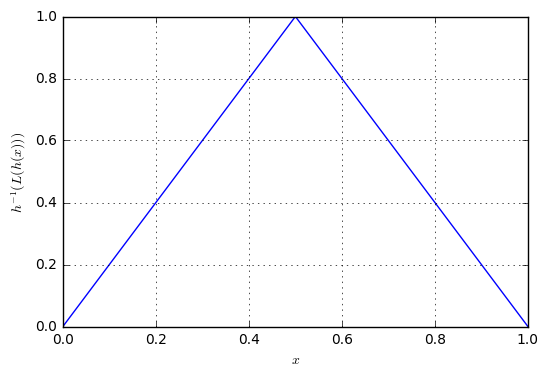

In [26]:
XX = np.linspace(0.0, 1.0, 251)
YY = [l2t(logi(t2l(x))) for x in XX]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$h^{-1}(L(h(x)))$")
ax.plot(XX, YY)
ax.grid()
plt.show()

Seosest järeldub, et igale telgikujutuse perioodilisele punktile $x$ vastab logistilise kujutuse perioodiline punkt $y = h(x)$ sama perioodiga:

In [27]:
x = sp.Rational(2, 7)
for _ in range(6):
    x = tent(x)
    sp.pprint(x)

4/7
6/7
2/7
4/7
6/7
2/7


In [28]:
y = t2l(x)
for _ in range(6):
    y = sp.trigsimp(logi(y))
    sp.pprint(y)

   ⎛3⋅π⎞    
cos⎜───⎟    
   ⎝ 7 ⎠   1
──────── + ─
   2       2
   2⎛π ⎞
cos ⎜──⎟
    ⎝14⎠
     ⎛2⋅π⎞    
  cos⎜───⎟    
     ⎝ 7 ⎠   1
- ──────── + ─
     2       2
   ⎛3⋅π⎞    
cos⎜───⎟    
   ⎝ 7 ⎠   1
──────── + ─
   2       2
   2⎛π ⎞
cos ⎜──⎟
    ⎝14⎠
     ⎛2⋅π⎞    
  cos⎜───⎟    
     ⎝ 7 ⎠   1
- ──────── + ─
     2       2


On näha, et $h(x)$ on tõepoolest perioodiline.